In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/ab-testing-practice/ab_testing.csv')
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [3]:
df.shape

(5000, 7)

In [4]:
df.isna().sum()

User ID       0
Group         0
Page Views    0
Time Spent    0
Conversion    0
Device        0
Location      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [6]:
df.describe()

,User ID,Page Views,Time Spent
count,5000.000000,5000.000000,5000.000000
mean,14925.159000,7.537600,242.512600
std,2869.153773,4.022465,118.254153
min,10001.000000,1.000000,40.000000
25%,12456.250000,4.000000,137.000000
50%,14858.500000,8.000000,243.000000
75%,17379.750000,11.000000,346.000000
max,19995.000000,14.000000,449.000000


In [7]:
df.columns

Index(['User ID', 'Group', 'Page Views', 'Time Spent', 'Conversion', 'Device',
       'Location'],
      dtype='object')

In [8]:
print(df.groupby("Group")["Time Spent"].mean())
print()
print(df.groupby("Group")["Page Views"].mean())

Group
A    241.733227
B    243.303910
Name: Time Spent, dtype: float64

Group
A    7.581580
B    7.492946
Name: Page Views, dtype: float64


In [9]:
df['Conversion'] = df['Conversion'].map({'Yes': True, 'No': False})
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,False,Mobile,Northern Ireland
1,11682,A,9,342,False,Mobile,Scotland
2,19825,A,2,396,False,Desktop,Northern Ireland
3,16080,B,4,318,False,Desktop,Wales
4,18851,A,1,338,True,Desktop,Scotland


In [10]:
groups = df.groupby('Group')['Conversion'].sum()
groups_name = ['Group A', 'Group B']

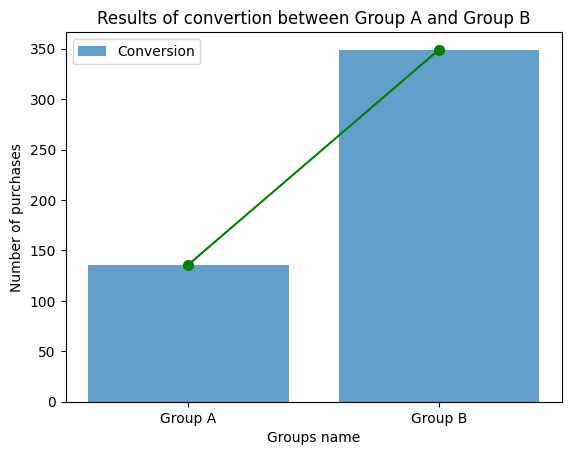

In [11]:
plt.bar(groups_name, groups, label='Conversion', alpha=.7)
plt.plot(groups_name, groups, color='green', marker='o', markersize=7)
plt.xlabel('Groups name')
plt.ylabel('Number of purchases')
plt.title('Results of convertion between Group A and Group B')
plt.legend();

In [12]:
groups = df.groupby('Group')['Conversion'].sum()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


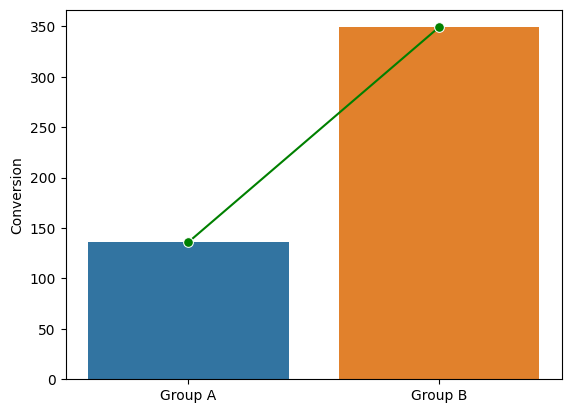

In [13]:
sns.barplot(x=groups_name, y=groups);
sns.lineplot(x=groups_name, y=groups, color='green', marker='o', markersize=7);